You can follow along and play with this notebook by clicking the badge below

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COGS118A/demo_notebooks/blob/main/lecture_04_linear_regression.ipynb)


## Linear regression


In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



# some utility functions to create toy data
# data ~ underlying function + gaussian noise

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size).reshape(-1, 1)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def a_sinusoidal_func(x):
    return np.sin(2 * np.pi * x)

def a_polynomial_func(x):
    return (12. + 6.14*x - 8.4*x*x)

def an_exp_func(x):
    return (1+1*np.exp(0.001*x))

def a_linear_func(x):
    return (1.17 + 3.14*x)

def a_discontinuous_func(x):
    return [ 1. if el>0.5 else 0. for el in x  ]
    
sample_size = 10
sigma = 0.3

#func = a_sinusoidal_func
#func = a_polynomial_func
#func = a_discontinuous_func
func = a_linear_func

# Some toy data generated by a linear function + noise

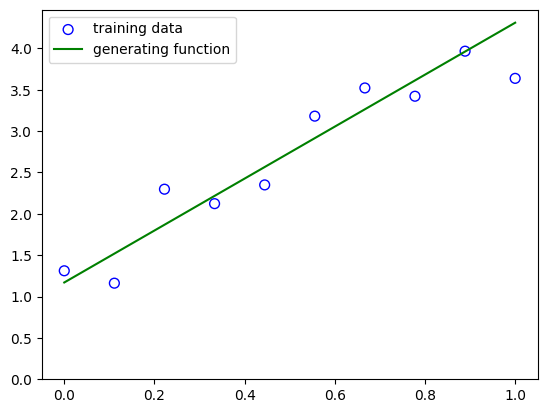

In [5]:
np.random.seed(1234)
x_train, y_train = create_toy_data(func, sample_size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_true = func(x_predict)


plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_predict, y_true, c="g", label="generating function")
plt.ylim(bottom=0.0)
plt.legend()
plt.show()

# Polynomial features:   $ 1 + x + x^2 \ldots$ 

In [6]:
features = PolynomialFeatures(degree=1)
features.fit(x_train)
features.transform(x_train)


array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

In [7]:
features2 = PolynomialFeatures(degree=1)
features2.fit(x_train)
features2.transform(x_train)


array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

# Solving for $\mathbf{w}$ using closed-form solution of OLS

$\mathbf{w^*}= \left( \mathbf{X}^\mathrm{T} \mathbf{X}\right)^{-1} \mathbf{X}^\mathrm{T} \mathbf{y} $

In [8]:
features = PolynomialFeatures(degree=1)
features.fit(x_train)
X_train = features.transform(x_train)

# this is the one step variation
# X_train = features.fit_transform(x_train)

X_train

array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

In [15]:
# in this code block, use numpy and 
# the closed form OLS solution above to find w^*
# then print out what the optimal parameters are
# YOUR CODE HERE
from numpy.linalg import inv

w_star  = inv(X_train.T @X_train )@X_train.T @y_train

The true generating function was $1.17 + 3.14*x$.  So if you did it right you will be in the zone of not too bad, but not right on. 

Let's slow down and do that again so we can see the linear algebra in action. In the coming code cells, take your solution for $\mathbf{w^*}$ above and break it up into chunks as it goes left to right... print the resulting matrices so you can see how the shape of the math changes during the equation

First do $\mathbf{X}^\mathrm{T}$

In [16]:
Xt = X_train.T

Now do $\left( \mathbf{X}^\mathrm{T} \mathbf{X} \right)$

In [17]:
 XtX= np.dot(Xt,X_train)

Now do $\left( \mathbf{X}^\mathrm{T} \mathbf{X} \right)^{-1}  $

In [21]:
iXtX  = inv(XtX)

Now do $\left( \mathbf{X}^\mathrm{T} \mathbf{X} \right)^{-1} \mathbf{X}^\mathrm{T} $

In [22]:
fXt = np.dot(iXtX, Xt)

you already know what the final step looks like, a (2,1) vector $\left( \mathbf{X}^\mathrm{T} \mathbf{X} \right)^{-1} \mathbf{X}^\mathrm{T} \mathbf{y} $

# There has to be an easier way!
There is! __scikit-learn__ provides a uniform interface to dozens of machine learning algorithms.  They code up the math, and make the computation of the math effecient/fast.

In [23]:
# if we hadn't have already built the bias term into features, 
# you need to call fit_intercept = True!!!
model = LinearRegression(fit_intercept=False) 

# YOUR CODE HERE!!! figure out how to call model.fit()
# docs are at 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
model.fit(X_train, y_train)

# now we will print out w*!
print(model.coef_)

[[1.30036632 2.79305726]]


# OK, 1 last thing
What if we try to do higher order curve fitting to data which is fundamentally linear?

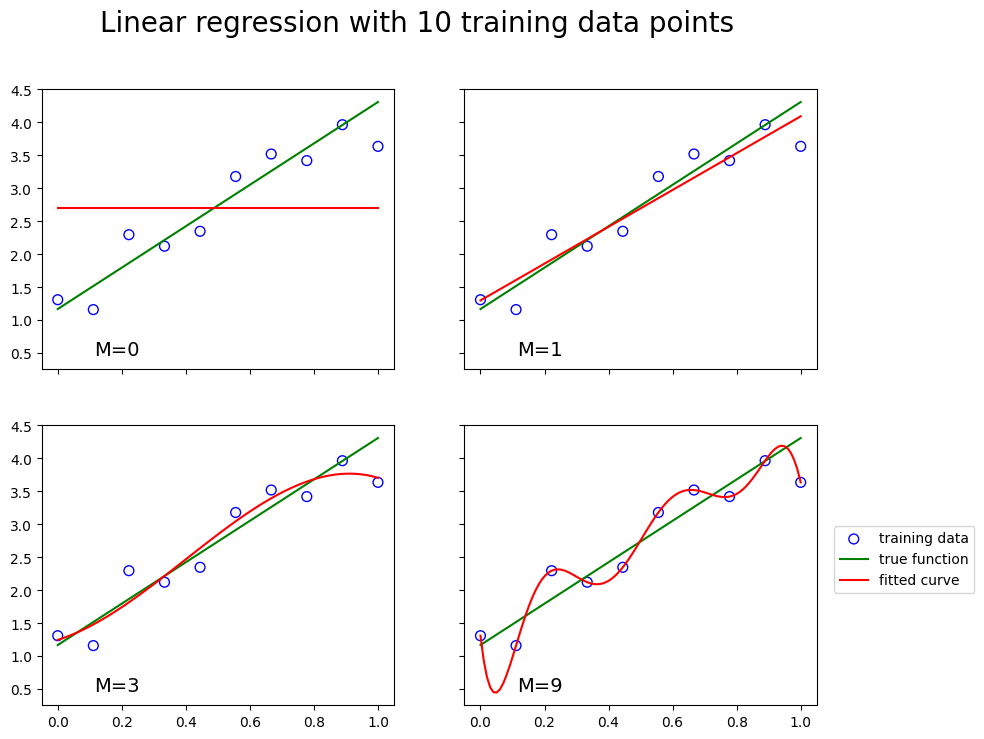

In [24]:
# make a graph with 2x2 subplots
fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(10, 8))
axs = axes.flatten()

# loop through fitting/plotting 0th, 1st, 3rd, and 9th order polynomials
for i, degree in enumerate([ 0, 1, 3, 9]):
    ax = axs[i]
    feature = PolynomialFeatures(degree)
    X_train = feature.fit_transform(x_train)     # training dataset
    X_predict = feature.fit_transform(x_predict) # validation dataset

    model = LinearRegression(fit_intercept=False)

    # YOUR CODE HERE!!! call model.fit() on training data
    # docs are at 
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
    model.fit(X_train, y_train)


    # YOUR CODE HERE!!! call model.predict() on validation data
    # docs are at 
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
    y_predict = model.predict(X_predict)



    ax.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    ax.plot(x_predict, y_true, c="g", label="true function")
    ax.plot(x_predict, y_predict, c="r", label="fitted curve")
    ax.annotate("M={}".format(degree), xy=(.15, .05),  xycoords='axes fraction', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.suptitle('Linear regression with 10 training data points',fontsize=20)
plt.show()

Hey wait? Did we just use OLS ("linear") regression to fit a non-linear curve to data??? **Why did that work?**